In [1]:
#install packages
#!conda install -c conda-forge wikipedia --yes 
!conda install -c conda-forge geocoder --yes 
!conda install -c conda-forge folium --yes 

print('packages installed')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    geocoder-1.38.1            |             py_0          52 KB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    orderedset-2.0             |           py35_0         685 KB  conda-forge
    ratelim-0.1.6              |           py35_0           5 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.1 MB

The following NEW packages will be INSTALLED:

    geocoder:        1.38.1-py_0       conda-forge
    orderedset:

In [2]:
#import packages
import pandas as pd
import numpy as np
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup
import geocoder
#import os
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


print('Libraries imported.')

Libraries imported.


In [4]:
new_york_data = []
#URL is mentioned in the assignment for a previous week
url='https://cocl.us/new_york_dataset'
resp=requests.get(url).json()
# all data is present in features label
features=resp['features']
    
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
# instantiate the dataframe
new_york_data = pd.DataFrame(columns=column_names)
    
for data in features:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    


#for tryingout
new_york_data_sample = new_york_data.head()

new_york_data_sample

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [18]:
venue_details=[]
#df = ['Bronx','Wakefield',40.894705,-73.847201,'abc123','NameRandom','Hotel']
df = []

for index, row in new_york_data.iterrows():
        try:
            
            radius=1000
            LIMIT=50
            CLIENT_ID = 'BPLL2RN2ELL0EPPZVEYI0OZFJGWBDZKE1QZHGVPPO1CD5CUJ'
            CLIENT_SECRET = 'CO1WKDESRXD05QRRYLPTRMOQX2SFQLRYHGB4SAGJ4DONXUUH'
            VERSION = '20180605' 
            lat = row['Latitude']
            lng = row['Longitude']
            brw = row['Borough']
            nbh = row['Neighborhood']


            #url to fetch data from foursquare api
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                        CLIENT_ID, 
                        CLIENT_SECRET, 
                        VERSION, 
                        lat, 
                        lng, 
                        radius, 
                        LIMIT)

            # get all the data
            results = requests.get(url).json()
            

#            venue_data=results["response"]['groups'][0]['items'] #comment this line to stop using the foursquare api. The venue calls are premium and the quota per day will be easily consumed
            
            
            venue_data
            for row in venue_data:
                try:
                    venue_id=row['venue']['id']
                    venue_name=row['venue']['name']
                    venue_category=row['venue']['categories'][0]['name']
                    venue_details.append([brw,nbh,lat,lng,venue_id,venue_name,venue_category])
                    #print(brw,nbh,lat,lng,venue_id,venue_name,venue_category)
                except KeyError:
                    pass

            column_names=['Borough','Neighbourhood','Latitude','Longitude','ID','Name','Category']
            df = pd.DataFrame(venue_details,columns=column_names)
        except KeyError:
            pass
        
df.to_csv('allData.csv', index=False)

In [21]:
df.Category.unique()

array(['Dessert Shop', 'Caribbean Restaurant', 'Pharmacy', 'Burger Joint',
       'Ice Cream Shop', 'Donut Shop', 'Sandwich Place',
       'Southern / Soul Food Restaurant', 'Mobile Phone Shop', 'Bakery',
       'Fried Chicken Joint', 'Fast Food Restaurant', 'Pizza Place',
       'Supermarket', 'Bank', 'Gas Station', 'Food', 'Discount Store',
       'Chinese Restaurant', 'Grocery Store', 'Bus Station',
       'Deli / Bodega', 'Spanish Restaurant', 'Food & Drink Shop',
       'Other Nightlife', 'Park', 'Restaurant', 'Dumpling Restaurant',
       'Seafood Restaurant', 'Mexican Restaurant', 'Shopping Mall',
       'Shoe Store', 'BBQ Joint', 'Kids Store', 'Video Game Store',
       'Furniture / Home Store', 'Bagel Shop', 'Department Store',
       'Coffee Shop', 'Breakfast Spot', 'Convenience Store',
       'Accessories Store', 'Clothing Store', 'Movie Theater', 'Nightclub',
       'Paper / Office Supplies Store', "Women's Store", 'Diner', 'Café',
       'Historic Site', 'Wine Shop', 'Gym'

In [23]:
df_test

,Borough,Neighbourhood,Latitude,Longitude,ID,Name,Category
0,Bronx,Wakefield,40.894705,-73.847201,4c537892fd2ea593cb077a28,Lollipops Gelato,Dessert Shop
1,Bronx,Wakefield,40.894705,-73.847201,4d375ce799fe8eec99fd2355,Ripe Kitchen & Bar,Caribbean Restaurant
2,Bronx,Wakefield,40.894705,-73.847201,4c9e50e38afca09379b2ff15,Ali's Roti Shop,Caribbean Restaurant
3,Bronx,Wakefield,40.894705,-73.847201,4c10f6aece57c92804a682d2,Jackie's West Indian Bakery,Caribbean Restaurant
4,Bronx,Wakefield,40.894705,-73.847201,4d6af9426107f04dedeb297a,Rite Aid,Pharmacy
5,Bronx,Wakefield,40.894705,-73.847201,4c1bed4eb306c928140763b7,Jimbo's,Burger Joint
6,Bronx,Wakefield,40.894705,-73.847201,4c783cef3badb1f7e4244b54,Carvel Ice Cream,Ice Cream Shop
7,Bronx,Wakefield,40.894705,-73.847201,4beda0fc6e8c20a14aa97061,Rite Aid,Pharmacy
8,Bronx,Wakefield,40.894705,-73.847201,508af256e4b0578944c87392,Cooler Runnings Jamaican Restaurant Inc,Caribbean Restaurant
9,Bronx,Wakefield,40.894705,-73.847201,4c25c212f1272d7f836385c5,Dunkin',Donut Shop


In [32]:
attraction_details = []

for index, row in df.iterrows():
    if row['Category'] == 'Park' or 'Historic Site' or 'Zoo' 'Tourist Information Center' or 'Waterfront'or 'National Park':
        attraction_details.append([row['Borough'], row['Neighbourhood'], row['ID'], row['Name'], row['Category']])
        

column_names=['Borough','Neighbourhood','ID','Name','Category']
df_attraction_details = pd.DataFrame(attraction_details,columns=column_names)

In [41]:
df_attraction_details.shape

(13336, 5)

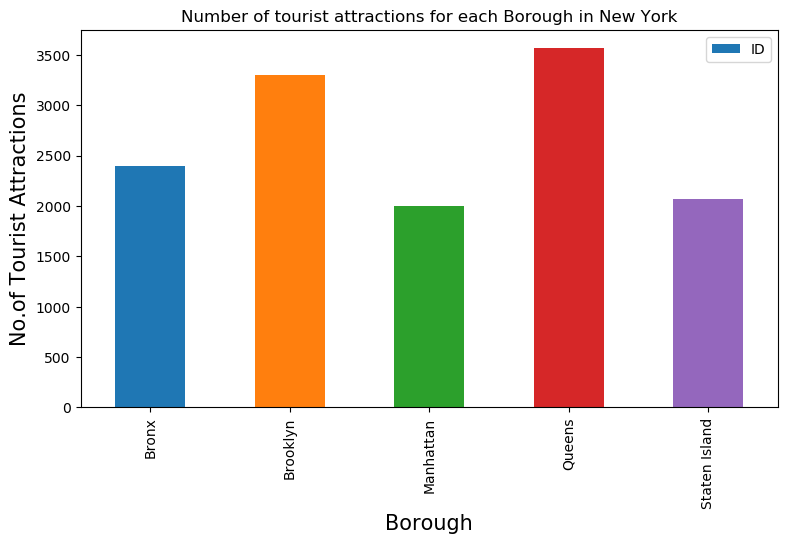

In [40]:
#Plotting the count of tourist attractions vs Borough

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of tourist attractions for each Borough in New York')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Tourist Attractions', fontsize=15)
#giving a bar plot
df_attraction_details.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [37]:


eating_details = []

for index, row in df.iterrows():
    if row['Category'] == 'Vegetarian / Vegan Restaurant':
        eating_details.append([row['Borough'], row['Neighbourhood'], row['ID'], row['Name'], row['Category']])
        

column_names=['Borough','Neighbourhood','ID','Name','Category']
df_eating_details = pd.DataFrame(eating_details,columns=column_names)
df_eating_details.shape

(37, 5)

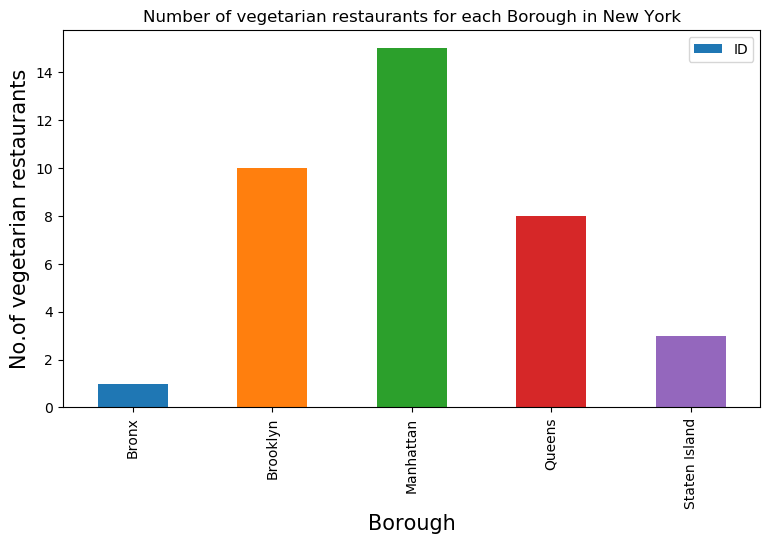

In [42]:
#Plotting the count of vegetarian restaurents vs borough

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of vegetarian restaurants for each Borough in New York')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of vegetarian restaurants', fontsize=15)
#giving a bar plot
df_eating_details.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [43]:
stay_details = []

for index, row in df.iterrows():
    if row['Category'] == 'Bed & Breakfast' or 'Motel' or 'Hostel':
        stay_details.append([row['Borough'], row['Neighbourhood'], row['ID'], row['Name'], row['Category']])
        

column_names=['Borough','Neighbourhood','ID','Name','Category']
df_stay_details = pd.DataFrame(stay_details,columns=column_names)
df_stay_details.shape

(13336, 5)

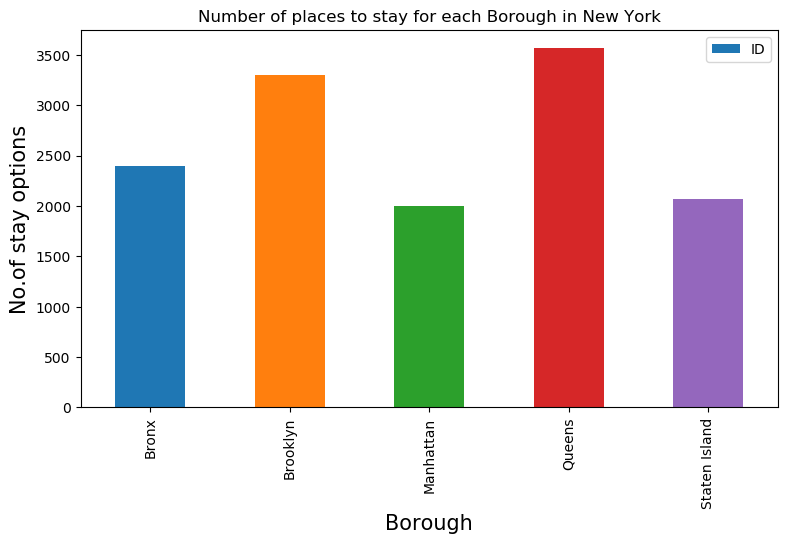

In [44]:
#Plotting the count of places to stay vs borough

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of places to stay for each Borough in New York')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of stay options', fontsize=15)
#giving a bar plot
df_stay_details.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

# Conclusion

The maximum number of tourist attractions that interest my family are in Queens and Brooklyn
The maximum number of Vegetarian restaurants are in Manhatten followed by Brookyln and Queens
The stay options are also the best in Queens and Brookyln.

Looking at the map of Newyork, it looks like its easier to go to Manhatten from Queens.

The plan:
Stay in Queens. Use the proximity to major tourist attractions.
For options to eat, Queens has 8 restaurants compared to Brookyln(10) or Manhatten (15). So eat in Queens or go to Manhatten for more options.

# Assumptions

All places are considered equal. The ratings are not used in this analysis. In the future, the ratings can also be used to pin-point the stay / eating / attractions.

